<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/MLPByClass1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install sklearn pandas

import pandas as pd
from google.colab import drive
drive = drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_1.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_1.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_1.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_1.csv")

In [10]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='macro', threshold=0.5)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model_by_class1.hdf5"

In [12]:
model = Sequential()

model.add(Dense(100, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(80, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(60, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(40, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(20, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

model.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=1)

Streaming output truncated to the last 5000 lines.
29/31 [===========================>..] - ETA: 0s - loss: 0.3155 - accuracy: 0.8403
Epoch 3752: loss did not improve from 0.30181
31/31 [==============================] - 1s 19ms/step - loss: 0.3153 - accuracy: 0.8402 - val_loss: 0.4238 - val_accuracy: 0.7492
Epoch 3753/5000
28/31 [==========================>...] - ETA: 0s - loss: 0.3225 - accuracy: 0.8349
Epoch 3753: loss did not improve from 0.30181
31/31 [==============================] - 1s 18ms/step - loss: 0.3214 - accuracy: 0.8353 - val_loss: 0.3796 - val_accuracy: 0.7790
Epoch 3754/5000
31/31 [==============================] - ETA: 0s - loss: 0.3121 - accuracy: 0.8386
Epoch 3754: loss did not improve from 0.30181
31/31 [==============================] - 1s 21ms/step - loss: 0.3121 - accuracy: 0.8386 - val_loss: 0.4536 - val_accuracy: 0.7174
Epoch 3755/5000
29/31 [===========================>..] - ETA: 0s - loss: 0.3062 - accuracy: 0.8427
Epoch 3755: loss did not improve from 0.3

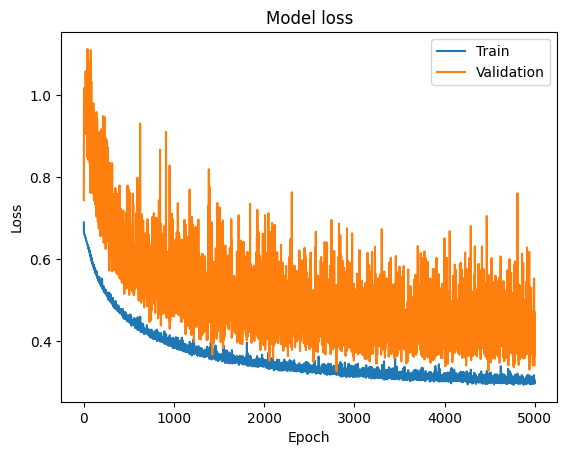



*********************************************




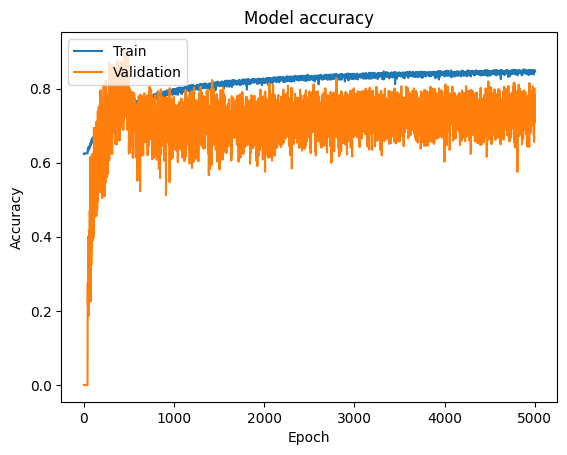



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 3ms/step - loss: 3.5335 - accuracy: 0.5121
[3.5335209369659424, 0.5120958089828491]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_2       0.65      0.61      0.63      2848
     class 1       0.26      0.30      0.28      1327

    accuracy                           0.51      4175
   macro avg       0.46      0.46      0.46      4175
weighted avg       0.53      0.51      0.52      4175



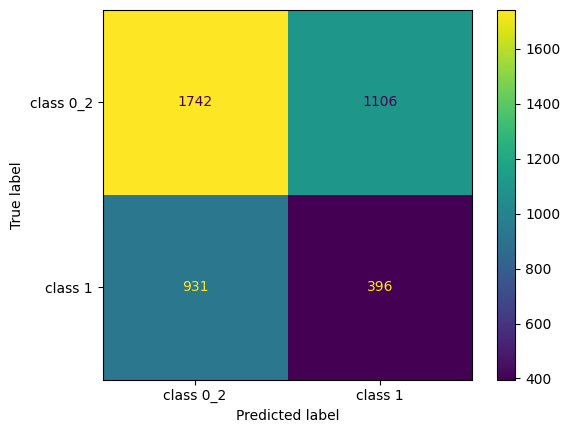



*********************************************
Train-set evaluate result:

712/712 [==============================] - 2s 2ms/step - loss: 0.3188 - accuracy: 0.8338
[0.3188401460647583, 0.8337723016738892]
712/712 [==============================] - 2s 3ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_2       0.82      0.85      0.84     11391
     class 1       0.85      0.81      0.83     11391

    accuracy                           0.83     22782
   macro avg       0.83      0.83      0.83     22782
weighted avg       0.83      0.83      0.83     22782



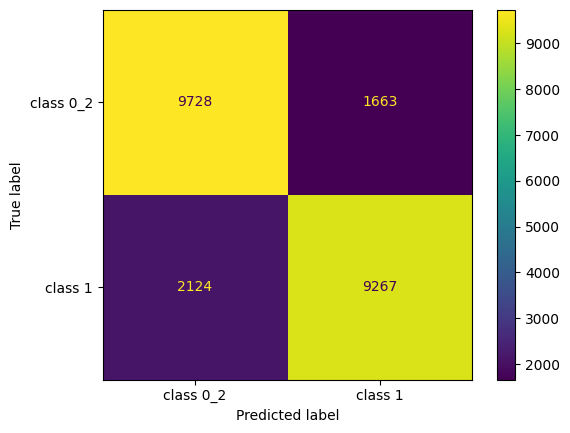

In [13]:
history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 5000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0_2', 'class 1']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int32)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int32)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [14]:
checkpoint.best

0.2927582859992981



*********************************************
Test-set evaluate result:

131/131 [==============================] - 0s 2ms/step - loss: 3.6311 - accuracy: 0.5207
[3.63114070892334, 0.5207185745239258]
131/131 [==============================] - 0s 2ms/step
Report for test set:

               precision    recall  f1-score   support

   class 0_2       0.64      0.66      0.65      2848
     class 1       0.23      0.22      0.22      1327

    accuracy                           0.52      4175
   macro avg       0.44      0.44      0.44      4175
weighted avg       0.51      0.52      0.52      4175



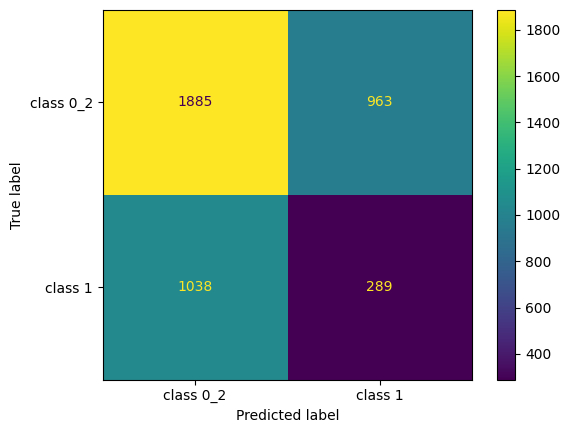



*********************************************
Train-set evaluate result:

712/712 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8317
[0.3173559904098511, 0.8316653370857239]
712/712 [==============================] - 1s 2ms/step
Report for train set:

               precision    recall  f1-score   support

   class 0_2       0.78      0.93      0.85     11391
     class 1       0.91      0.74      0.81     11391

    accuracy                           0.83     22782
   macro avg       0.84      0.83      0.83     22782
weighted avg       0.84      0.83      0.83     22782



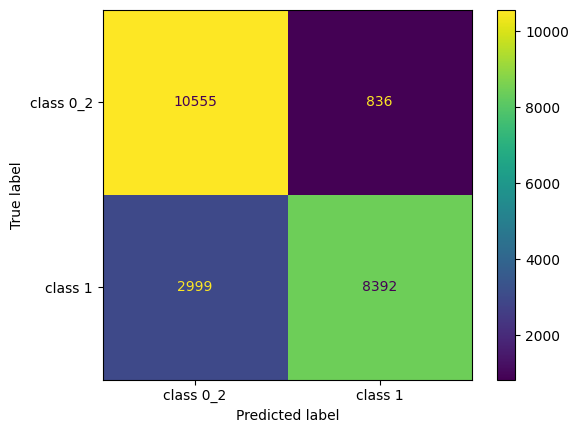

In [15]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0_2', 'class 1']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction =(test_prediction_points > 0.5).astype(numpy.int32)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix, display_labels=target_names)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction =(train_prediction_points > 0.5).astype(numpy.int32)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix, display_labels=target_names)
train_disp.plot()
plt.show()

In [16]:
model.save("/content/drive/MyDrive/new_df/best_model_by_class1")